# Random forest - classification 


## A - Using ensembles to build classification models to separate binders and nonbinders of BACE

We will use the dataset "BACE" from MoleculeNet (https://moleculenet.org/datasets-1). 

This data set contains labels (strong or weak inhibitor) for 1513 inhibitors of the protein human beta-secretase (BACE-1).

Later, we will use decision trees and ensembles of decision trees (random forests) to build classification models.

First, we will read the dataset using pandas.

In [7]:
import pandas as pd

bace1_file = "https://raw.githubusercontent.com/anunesalves/machinelearning-wise23/main/datasets/BACE1_descrd.csv"
bace1_df = pd.read_csv(bace1_file)
bace1_df.head(5)

,SMILES,pIC50,Class,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,OC(C(NC(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(N...,10.522879,1,14.257963,14.257963,0.049082,-1.819899,0.017390,1350.495,1262.799,...,0,0,0,0,0,0,0,0,0,0
1,S(=O)(=O)(CC(NC(OCn1nc(cc1C)C)=O)C(=O)NC(C(O)C...,9.522879,1,13.310701,13.310701,0.010284,-3.725441,0.154894,658.863,604.431,...,0,0,1,0,0,0,0,0,0,0
2,OC(C(NC(=O)C(NC(=O)C(NC(=O)C([NH3+])CCC(=O)[O-...,9.522879,1,13.636910,13.636910,0.038768,-1.760366,0.034353,933.046,866.518,...,0,0,0,0,0,0,0,0,0,0
3,O=C(NCCC(C)(C)C)C(Cc1cc2cc(ccc2nc1N)-c1ccccc1C)C,9.187087,1,12.512394,12.512394,0.062415,-0.161047,0.569005,403.570,370.306,...,0,0,0,0,0,0,0,0,0,0
4,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,9.154901,1,12.864976,12.864976,0.056350,-0.193508,0.592935,431.580,398.316,...,0,0,0,0,0,0,0,0,0,0


In [8]:
smiles = bace1_df['SMILES']
labels = bace1_df['Class'] 
print("Number of data points in the dataset:")
print(len(smiles))

Number of data points in the dataset:
1513


We will obtain 6 physicochemical features (molecular weight, topological polar surface area, log of octanol/water partition coefficient, number of H bond donors, number of H bond acceptors, number of rotatable bonds) among the features available. We will use these features to predict the labels for the test set.

No standardization of values is required to build models using decision trees or ensembles of decision trees.
As each feature is processed separately, and the possible splits of the data don’t depend on scaling, no preprocessing like standardization of features is needed.

In [9]:
# select 6 features
descnm=["MolWt","TPSA","MolLogP","NumHDonors","NumHAcceptors","NumRotatableBonds"]

features_org=bace1_df[descnm]
features_org.head(5)


,MolWt,TPSA,MolLogP,NumHDonors,NumHAcceptors,NumRotatableBonds
0,1350.495,525.06,-5.56230,15,18,40
1,658.863,197.82,1.42784,5,10,18
2,933.046,382.99,-6.16620,8,15,31
3,403.570,68.01,5.52342,2,3,6
4,431.580,77.24,5.04482,2,4,5


### Decision trees

We will build a classification model using decision trees, which are implemented in the class DecisionTreeClassifier, available in the Python library Scikit-Learn. Decision trees learn a hierarchy of questions (is the molecular weight larger than X g/mol?), leading to a decision (the molecule is a strong / weak inhibitor of BACE). In decision trees, the model predicts the value of a target variable (the class) by learning simple decision rules inferred from the features available. 

To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable (the class of the data point).
Repeating the process of finding informative tests yields a binary tree of decisions, with each node containing a
test.
Ideally, the recursive partitioning of the data is repeated until each region in the partition (each leaf in the decision tree) only contains a single target value (a single class).

The main hyperparameters of this method are max_depth, the maximum depth of the tree, and max_features, the number of features to consider when looking for the best split of a node (usually, the squared root of the total number of features for classification). Other hyperparamaters, which are related to max_depth, since they also affect the depth of the tree, are max_leaf_nodes (maximum number of leaf nodes) and min_samples_leaf (minimum number of samples required for a leaf node). 
In this exercise, we will explore the effect of max_depth in the predictions.

For more information, see:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

We will use the function 'train_test_split' from scikit-learn to randomly split the data set into training and test set.

Then, we will fit our model using decision trees and the training set. 

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# split the data set (labels and features) into training set and test set 
# specify a number in the random state to make results reproducible
feat_train, feat_test, label_train, label_test = train_test_split(features_org, labels, test_size=0.33, 
                                                                  random_state=17)

dt_max = DecisionTreeClassifier(max_depth=None, random_state=100)

# Fit the classifier using the training set.
dt_max.fit(feat_train, label_train)


DecisionTreeClassifier(random_state=100)

Now we will use our model to make predictions for the test set.

We will also calculate the accuracy for the training and test sets.

In [11]:
# Make predictions for the test set.
print("Test set predictions: {}".format(dt_max.predict(feat_test)))


Test set predictions: [1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0
 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0
 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1
 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1
 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0
 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0
 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0
 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0
 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0
 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1
 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1
 0 

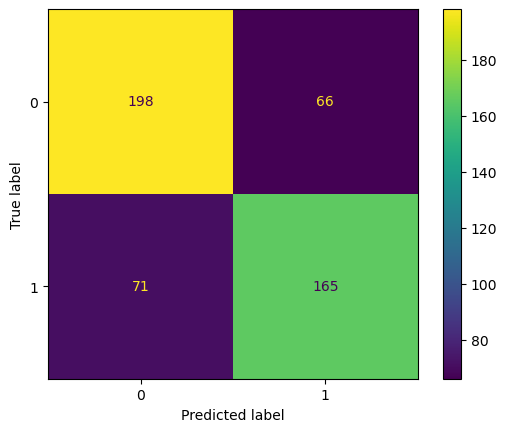

In [17]:
# Display the Confusion matrix for the test set.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions=dt_max.predict(feat_test)
cm = confusion_matrix(label_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='viridis')  


In [18]:
# Extract values from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate accuracy
accuracy = (tp + tn) / (tp + fn + tn + fp)
# Calculate sensitivity 
sensitivity = tp / (tp + fn)
# Calculate specificity
specificity = tn / (tn + fp)

print(f"Test set accuracy: {accuracy:.2f}")
print(f"Test set sensitivity: {sensitivity:.2f}")
print(f"Test set specificity: {specificity:.2f}")

Test set accuracy: 0.73
Test set sensitivity: 0.70
Test set specificity: 0.75


In [20]:
# Calculate the accuracy for the training set.
print("Training set accuracy: {:.2f}".format(dt_max.score(feat_train, label_train)))
# Calculate the accuracy for the prediction for the test set.
print("Test set accuracy: {:.2f}".format(dt_max.score(feat_test, label_test)))

Training set accuracy: 0.98
Test set accuracy: 0.73


Note that the accuracy for the traning set (98% of predictions correct) is higher than the accuracy for the test set (73% of predictions correct). This difference, associated with an accuracy of almost 100% for the training set, is an indiciation of overfitting of the model to the training data.

When we do not set up a maximum depth, the tree is usually grown until all leaves are pure, leading to a model that is very complex and highly overfits to the training data.

One of the strategies to avoid overfitting in decision trees is to limit the maximum depth of the tree.
In the example below, we will limit the maximum depth of the tree to 8. 

Note that the accuracy for the training set will be reduced, but the accuracy for the test set will be slightly higher.

In [21]:
dt_max10 = DecisionTreeClassifier(max_depth=8, random_state=100)

# Fit the classifier using the training set.
dt_max10.fit(feat_train, label_train)

# Calculate the accuracy for the training set.
print("Training set accuracy: {:.2f}".format(dt_max10.score(feat_train, label_train)))
# Calculate the accuracy for the prediction for the test set.
print("Test set accuracy: {:.2f}".format(dt_max10.score(feat_test, label_test)))

Training set accuracy: 0.85
Test set accuracy: 0.74


One of the advantages of decision trees is that they are easy to understand, in comparison with ensembles of decision trees.

We can visualize the tree using matplotlib to understand how the model makes predictions.

First, we will generate a tree with a maximum depth of 3 to facilitate visualization.

Then, we will plot the resulting tree.

Each square corresponds to a node. Nodes with no further connection lines are called leaf nodes. These are the nodes where the final decision about the data point (to which class the data point belongs) is taken.

The color of the node reflects the majority class in the node (orange for class 0, blue for class 1).

The first line in the node shows the feature used for splitting, and the threshold value used for splitting. Note that some features (for instance, MW) are used more than once, while other features (like HD) are not used at all.

The "samples" shown in each node gives the number of samples or data points in that node, while "value" provides the number of data points per class.

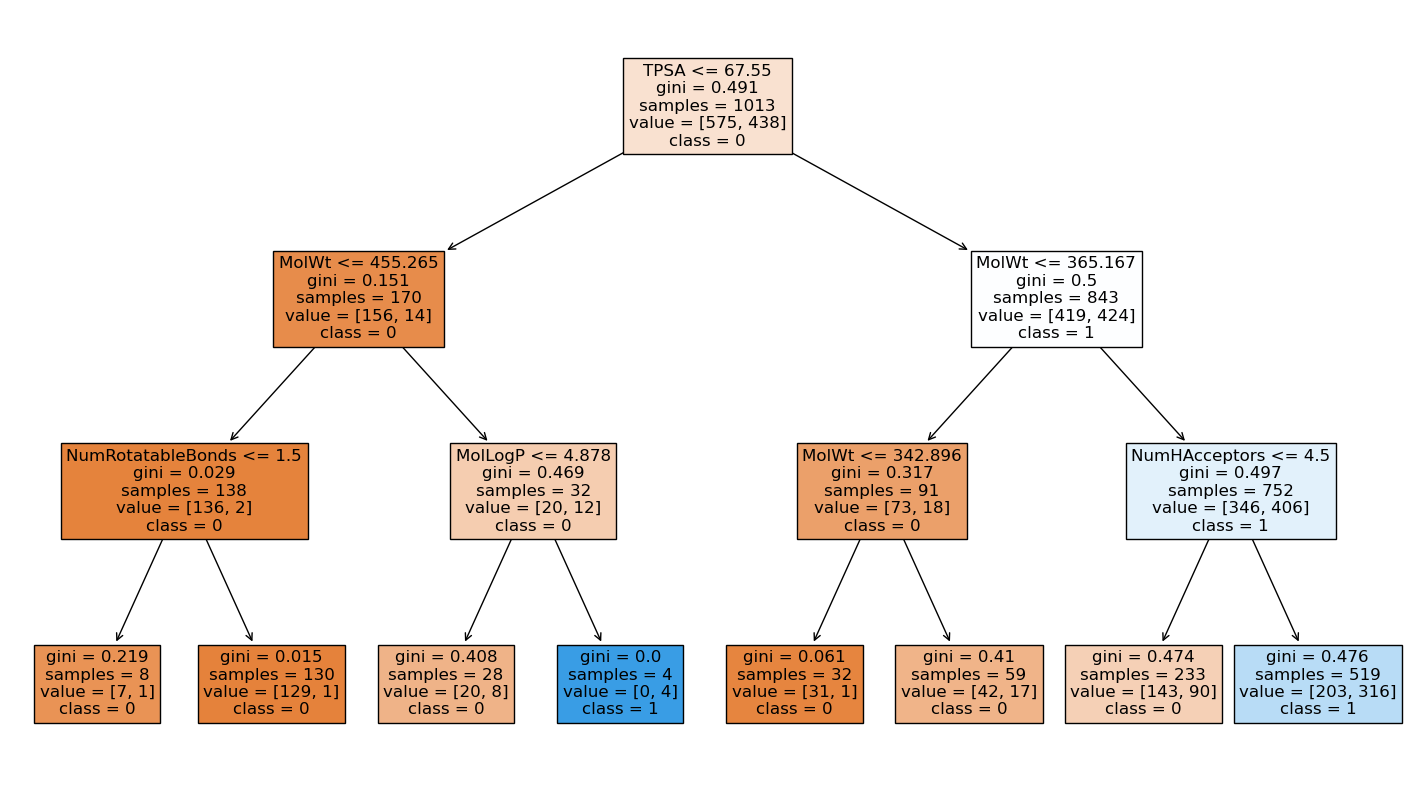

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

dt_max3 = DecisionTreeClassifier(max_depth=3, random_state=100)

# Fit the classifier using the training set.
dt_max3.fit(feat_train, label_train)

# Visualize the Decision Tree using Matplotlib
plt.figure(figsize=(18, 10))
plot_tree(dt_max3, filled=True, feature_names=descnm, class_names=["0", "1"], fontsize=12)
plt.show()


### Random forests

Another strategy to avoid overfitting in decision trees is to use an ensemble of decision trees. 
In most applications, these ensemble methods are usually employed, instead of a single decision tree. 
In this notebook, we will see the ensemble model random forests.

We will build a classification model using random forest, which is implemented in the class RandomForestClassifier, available in the Python library Scikit-Learn. 
A random forest is a group of decision trees, where each tree is different from the others.
The bootstrap sampling leads to each decision tree in the random forest being built on a different part of the training set, guaranteeing variability among the trees.

In bootstrap sampling, we repeatedly draw data points from the training set randomly with replacement (meaning the
same data point can be picked multiple times). The aim is to create a sample that is as big as the original training set, but different from it. Some data points will be missing, and some will be repeated.

In addition to the hyperparameters presented above for decision trees, the main hyperparameter of this method is n_estimators, the number of trees in the forest.
In this exercise, we will explore the effect of the number of trees in the predictions.

For more information, see:
    
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html    

We will fit our model using random forest, 500 trees and the training set. 

Note that the same training and test sets used to build models for decision trees will be used here, what allows us to compare the models.

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_t500 = RandomForestClassifier(n_estimators=500, random_state=100)

# Fit the classifier using the training set.
rf_t500.fit(feat_train, label_train)

RandomForestClassifier(n_estimators=500, random_state=100)

Now we will calculate the accuracy for the training and test sets.

In [25]:
# Calculate the accuracy for the training set.
print("Training set accuracy: {:.2f}".format(rf_t500.score(feat_train, label_train)))
# Calculate the accuracy for the prediction for the test set.
print("Test set accuracy: {:.2f}".format(rf_t500.score(feat_test, label_test)))

Training set accuracy: 0.98
Test set accuracy: 0.77


Note that the model has a slightly better performance for the test set than the decision tree.

This improved performance is associated to the use of a large number of trees. 
In the example below, you will see that a reduction of the number of trees to 5 leads to a decrease in the accuracy for the training and test sets.


In [26]:
rf_t2 = RandomForestClassifier(n_estimators=5, random_state=100)

# Fit the classifier using the training set.
rf_t2.fit(feat_train, label_train)

# Calculate the accuracy for the training set.
print("Training set accuracy: {:.2f}".format(rf_t2.score(feat_train, label_train)))
# Calculate the accuracy for the prediction for the test set.
print("Test set accuracy: {:.2f}".format(rf_t2.score(feat_test, label_test)))

Training set accuracy: 0.95
Test set accuracy: 0.73
